##Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

##Loading the dataset


In [8]:
df = pd.read_csv('advertising_sales_data.csv')
df['Campaign'] = range(1, 201)
df

,Campaign,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,12.0
3,4,151.5,41.3,58.5,16.5
4,5,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,14.0
197,198,177.0,9.3,6.4,14.8
198,199,283.6,42.0,66.2,25.5


In [9]:
df.isnull().sum()
# df.iloc[df['Radio'].isnull()] #19, 127, 152
df.iloc[19]

Campaign      20.0
TV           147.3
Radio          NaN
Newspaper     19.1
Sales         14.6
Name: 19, dtype: float64

In [16]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['Radio']] = imputer.fit_transform(df[['Radio']])

###1. What is the average amount spent on TV advertising in the dataset?


In [17]:
avg_TV = df['TV'].mean()
print(f"Average amount spent on TV advertising is: ${avg_TV:.2f}")

Average amount spent on TV advertising is: $147.04


###2. What is the correlation between radio advertising expenditure and product sales?

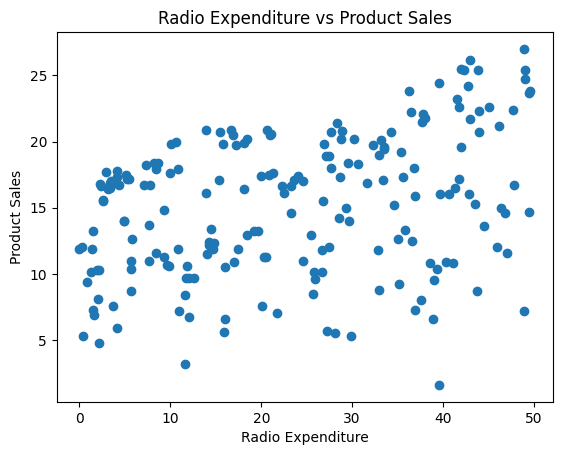

The correlation is: 0.35


In [18]:
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio Expenditure')
plt.ylabel('Product Sales')
plt.title('Radio Expenditure vs Product Sales')
plt.show()

# Calculating the correlation between radio advertising expenditure and product sales.
correlation_radio_sales = df['Radio'].corr(df['Sales'])
print(f"The correlation is: {correlation_radio_sales:.2f}")

# There is a moderate positive correlation

###3. Which advertising medium has the highest impact on sales based on the dataset?


In [19]:
# Calculating the correlation between each advertising medium and sales.
correlation_TV_sales = df['TV'].corr(df['Sales'])
correlation_radio_sales = df['Radio'].corr(df['Sales'])
correlation_newspaper_sales = df['Newspaper'].corr(df['Sales'])

highest_correlation = max(correlation_TV_sales, correlation_radio_sales, correlation_newspaper_sales)

# Printing the advertising medium with the highest impact on sales.
if highest_correlation == correlation_TV_sales:
  print("TV advertising has the highest impact on sales.")
elif highest_correlation == correlation_radio_sales:
  print("Radio advertising has the highest impact on sales.")
else:
  print("Newspaper advertising has the highest impact on sales.")


TV advertising has the highest impact on sales.


###4. Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.

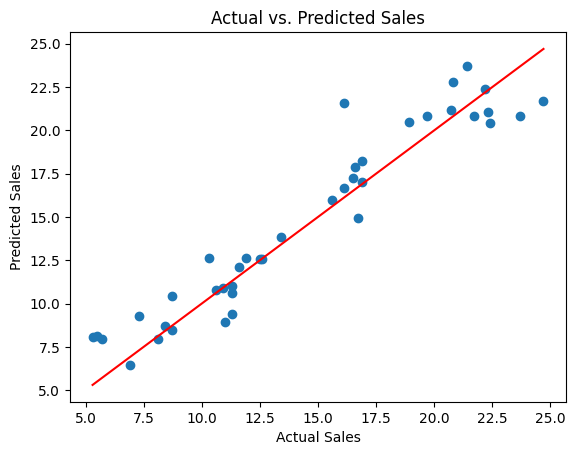

Mean squared error: 2.9074318865000555
R^2 score: 0.9059117026092904


In [21]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')

# Adding the linear regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R^2 score: {r2}")

###5. How would sales be predicted for a new set of advertising expenditures 200 on TV, 40 on Radio and 50 on Newspaper?


In [ ]:
# Creating a new DataFrame with the new advertising expenditures
prediction_df = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [50]})


# Using the trained model to make a prediction
sales_prediction = model.predict(prediction_df)

print(f"Predicted Sales: ${sales_prediction[0]:.2f}")

Predicted Sales: $19.87


###6. How does the performance of the linear regression model change when the dataset is normalized?

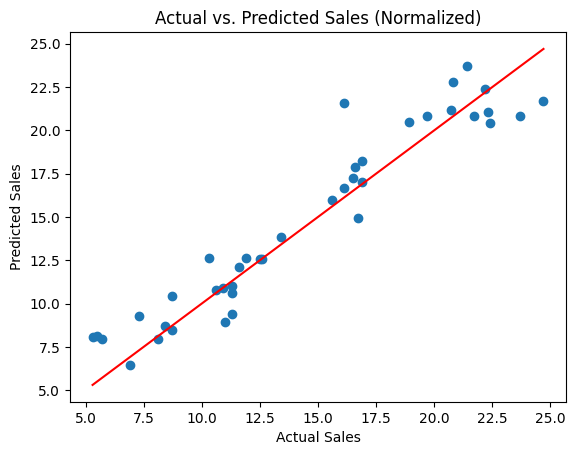

Mean Squared Error (Normalized): 2.907431886500056
R^2 Score (Normalized): 0.9059117026092904


In [22]:

# Splitting the data into features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
# Normalizing the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Splitting the normalized data into training and testing sets
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Training the model on normalized data
model_norm = LinearRegression()
model_norm.fit(X_train_norm, y_train)

# Making predictions
y_pred_norm = model_norm.predict(X_test_norm)

# Calculating performance metrics
mse_norm = mean_squared_error(y_test, y_pred_norm)
r2_norm = r2_score(y_test, y_pred_norm)

# Plotting the results
plt.scatter(y_test, y_pred_norm)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Normalized)')

# Adding the linear regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

print(f'Mean Squared Error (Normalized): {mse_norm}')
print(f'R^2 Score (Normalized): {r2_norm}')


# The performance metrics for both the non-normalized and normalized datasets are almost identical.
# This indicates that normalization did not have a significant impact on the performance of the linear regression model in this case.

###7. What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

In [23]:

# Splitting the data into features (X) and target variable (y)
# Using only Radio and Newspaper advertising expenditures as predictors
X_radio_newspaper = df[['Radio', 'Newspaper']]
y = df['Sales']

# Splitting the data into training and testing sets
X_train_radio_newspaper, X_test_radio_newspaper, y_train, y_test = train_test_split(X_radio_newspaper, y, test_size=0.2, random_state=42)

# Training the model
model_radio_newspaper = LinearRegression()
model_radio_newspaper.fit(X_train_radio_newspaper, y_train)


# Making predictions
y_pred_radio_newspaper = model_radio_newspaper.predict(X_test_radio_newspaper)

# Calculating performance metrics
mse_radio_newspaper = mean_squared_error(y_test, y_pred_radio_newspaper)
r2_radio_newspaper = r2_score(y_test, y_pred_radio_newspaper)

# Printing the results
print('Impact of using only Radio and Newspaper advertising expenditures:')
print(f'Mean Squared Error: {mse_radio_newspaper}')
print(f'R^2 Score: {r2_radio_newspaper}')

# Comparing the performance with the full model
print('Comparison with full model:')
print(f'Full Model MSE: {mse}')
print(f'Full Model R^2: {r2}')

# Using only Radio and Newspaper advertising expenditures resulted in a slightly lower performance compared to the full model.
# This indicates that TV advertising expenditure also contributes to the prediction of sales.


Impact of using only Radio and Newspaper advertising expenditures:
Mean Squared Error: 27.50240015808231
R^2 Score: 0.10998637077378115
Comparison with full model:
Full Model MSE: 2.9074318865000555
Full Model R^2: 0.9059117026092904
